# Optimal Portfolio
This notebook construct 3 different optimal portfolios. The maximum sharpe-ratio portfolio (*simple risk adjusted return*), the maximum calmar-ratio portfolio (*maximum drawdown adjusted return*) and the minimum variance portfolio.

\begin{align}
    \text{Sharpe Ratio}&=\frac{R_{p}-R_{f}}{\sigma_{p}}\\
    \text{Calmar Ratio}&=\frac{R_{p}-R_{f}}{\text{Maximum Drawdown}}
\end{align}
where $R_{p}$ denotes the portfolio's annualized return, $R_{f}$ denotes the risk-free interest rate, $\sigma_{p}$ denotes the standard deviation ($\approx$*risk*) of the portfolio and maximum drawdown is measured as the pct.-change from trough to peak, i.e. peak-value minus trough-value divided by peak-value.




In [1]:
############## Loading relevant packages ##############
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# local module
import pftools
import VaR_and_ES as vares
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

## Loading and cleaning data
In this notebook, data can be fetched using the downloaded CSV-files or using the yahoo database.

In [2]:
# pick which tickers to use in the analysis.
# Make sure names are compatible with yahoo database or file-name
tickers = ['SXR8', 'XACTC25', 'XDJP', 'LCUA' ,'SXRP', 'SXRL', 'XJSE']

# getting data from a local csv-file
df, rdf, cdf = pftools.df_generator(tickers,'csv','C:/Users/olufk/OneDrive/Documents/GitHub/PortfolioDesign/PortfolioDesign/OptimalPF/Data_Investing_com/')

Will eventually output description of each ticker in df


In [3]:
# pick which tickers to use in the analysis.
# Make sure names are compatible with yahoo database or file-name
tickers = ['fortum.he', 'danske.co', 'saf.pa', 'wm']

# enter time period of interest
start = dt.datetime(2014, 6, 30)
end = dt.datetime(2019, 6, 30)

# getting data from yahoo database
df, rdf, cdf = pftools.df_generator(tickers,'yahoo')

No starttime selected, has therefore chosen default closest to (5 years before today) 2016-08-31
No endtime selected, has therefore chosen default closest to (today) 2021-08-30
Will eventually output description of each ticker in df


## Describing each tickers
Now that data is loaded, it's time to get an idea of the characteristics of the tickers

C:\Users\olufk\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\olufk\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\olufk\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\olufk\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


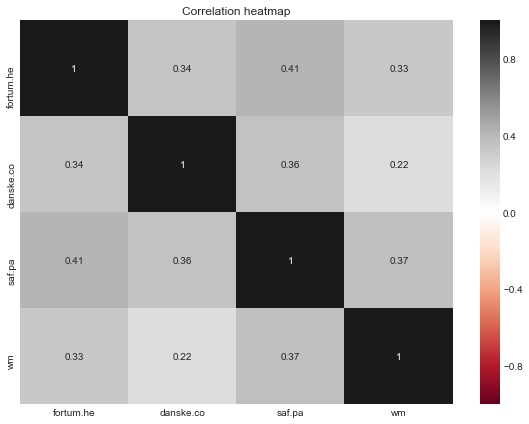

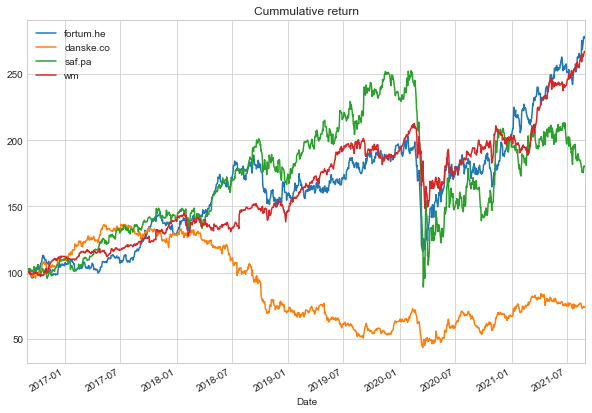

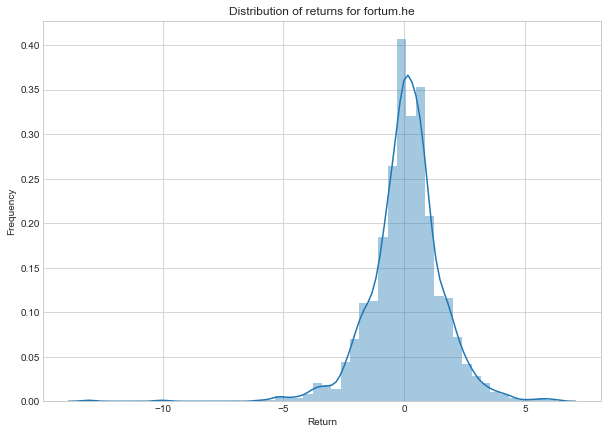

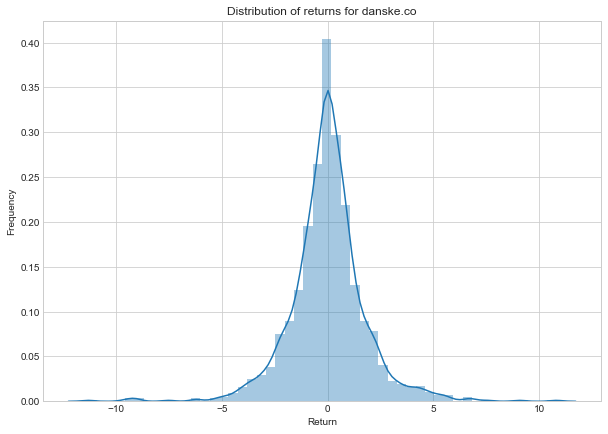

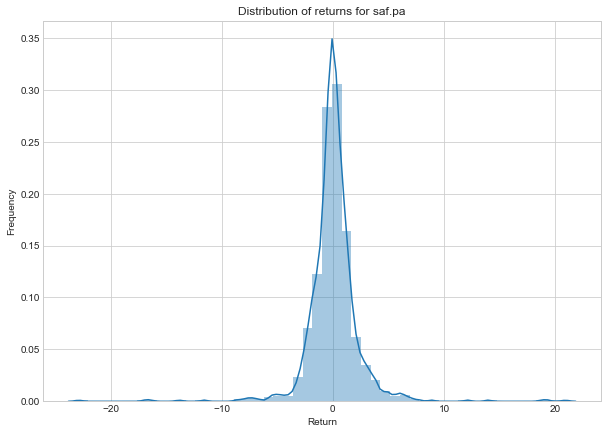

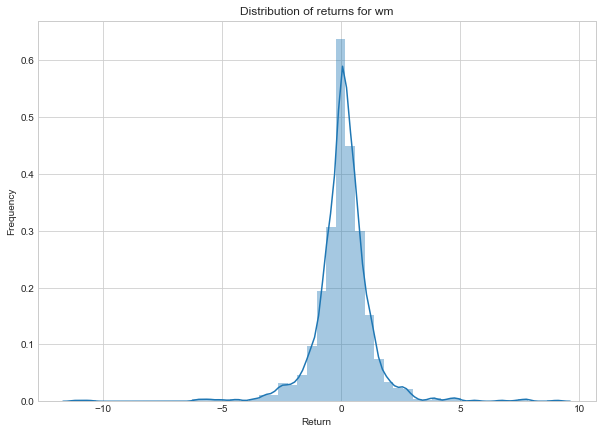

,Ticker,annualized_return,volatility,sharpe_ratio,calmar_ratio
0,fortum.he,15.20,23.71,0.64,1.16
1,danske.co,-3.99,28.79,-0.14,-0.35
2,saf.pa,8.43,37.07,0.23,0.37
3,wm,14.52,20.17,0.72,1.31


In [4]:
pftools.desc_ticks(df,rdf,cdf)

In [5]:
omega_hat, alpha_hat, ll = vares.ARCH1_est('wm',df)

Estimating wm as a ARCH(1)-model resulted in:
Omega^hat                       --> 0.7034 with std. errors (0.0297) and t-val 23.6808
alpha^hat                       --> 0.7570 with std. errors (0.0594) and t-val 12.7476
Maximized log-likelihood        --> -1503.037
--------------------------------------------------------------------------------------


Risk measures for wm at 2 period losses with a 0.05 risk level is
-----------------------------------------
Gauss
-----
VaR                             --> 2.96
ES                              --> 3.72
-----------------------------------------
ARCH(1)
------
VaR (average)                   --> 2.90
ES  (average)                   --> 3.72
-----------------------------------------


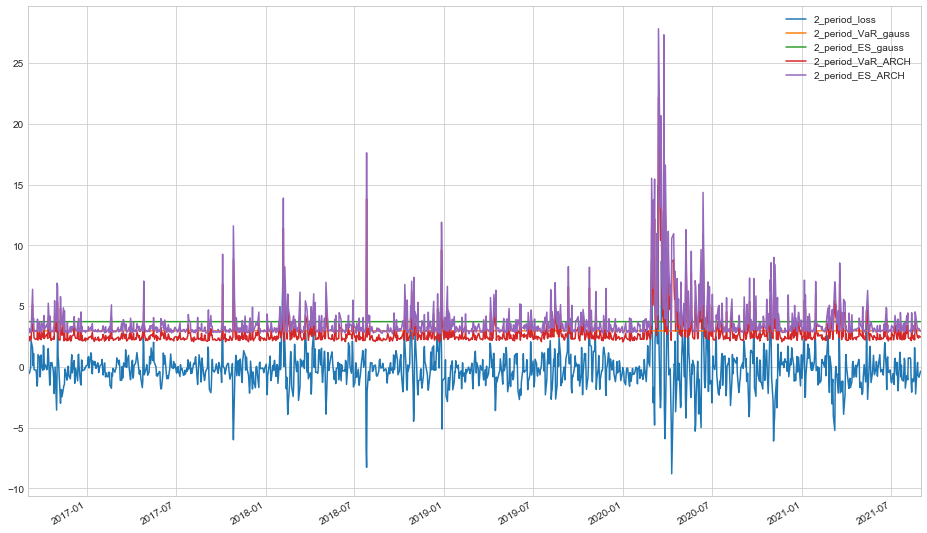

In [6]:
vares_df = vares.VaRES(omega_hat,alpha_hat,df,'wm',0.05,2,2000)
vares_df.plot(figsize = (16,10));

In [140]:
# analytical solutions for minimum variance portfolio (allows for shortselling)
logrdf = np.log(df).diff().dropna()*100
# Covariance matrix
sigma = logrdf.cov()*252
# calculating weights by W^-1 dot l where l is a vector of ones
weights = np.linalg.inv(sigma)@np.ones((len(df.columns)))
# normalizing weights
nweights = weights / sum(weights)

# calculating yearly variance and standard-deviation
variance = nweights@sigma@np.transpose(nweights)
variance
sd = np.sqrt(variance)
sd
# calculating yearly return
assetreturns = logrdf.mean()*252
pfreturn = nweights@assetreturns
pfreturn

print(variance)
print(sd)
print(pfreturn)


287.8046381717852
16.964805868968416
14.974670186235649


In [144]:
# analytical solutions for the efficient tangency portfolio (allows for shortselling)
# The efficient tangency portfolio
logrdf = np.log(df).diff().dropna()*100
# Covariance matrix
sigma = logrdf.cov()*252
weights = np.linalg.inv(sigma) @ logrdf.mean()*252
nweights = weights/sum(weights)

# calculating yearly variance and standard-deviation
variance = nweights@sigma@nweights
sd = np.sqrt(variance)


# calculating yearly return
pfreturn = nweights@logrdf.mean()*252

print(nweights)
print(variance)
print(sd)
print(pfreturn)


[ 0.67129928 -0.42114215 -0.08046473  0.8303076 ]
593.3062835889621
24.35787929169865
30.870127641455415


In [ ]:
# Can calmar ratio maximizing pf be solved analytically (where short-selling is allowed)

In [344]:
pftools.optimal_portfolios(df,False,100)
# This should also be applied for calmar ratio maximising portfolio
# first create function to minimize, then call it properly

Will numerically solve the minimum variance portfolio
-----------------------------------------------------------------------------------------------
Attempt 1 - minvar portfolio - with w0 (initial guess) = [0.16, 0.59, 0.39, 0.92]

Weights converged at [0.28, 0.18, 0.0, 0.54] with variance = 289.49.


Attempt 2 - minvar portfolio - with w0 (initial guess) = [0.58, 0.72, 0.55, 0.68]

Weights converged at [0.28, 0.18, 0.0, 0.54] with variance = 289.49.


Attempt 3 - minvar portfolio - with w0 (initial guess) = [0.18, 0.36, 0.02, 0.48]

Weights converged at [0.28, 0.18, 0.0, 0.54] with variance = 289.49.


Attempt 4 - minvar portfolio - with w0 (initial guess) = [0.47, 0.88, 0.98, 0.52]

Weights converged at [0.28, 0.18, 0.0, 0.54] with variance = 289.49.


Attempt 5 - minvar portfolio - with w0 (initial guess) = [0.5, 0.55, 0.82, 0.5]

Weights converged at [0.28, 0.18, 0.0, 0.54] with variance = 289.49.


Attempt 7 - minvar portfolio - with w0 (initial guess) = [0.4, 0.88, 0.52, 0.54]



<function pftools.optimal_portfolios(df, printres=True, N=50)>

In [323]:
# When imposing a constraint of no shortselling - the problem can't be solved analytically but will have to be solved numerically
from scipy import optimize


def mvar(w,sigma):    
    # i. normalizing weights
    nw = w/sum(w)
    
    # ii. calculating variance based on given weights
    variance = nw @ sigma @ nw
    
    return variance


# helping function for efficient tangent portfolio
def tangent(w,sigma,mu):
    # i. normalizing weights
    nw = w/sum(w)

    # ii. calvulating yearly variance+standard deviation based on given weights
    variance = nw @ sigma @ nw
    sd = np.sqrt(variance)

    # iii. calculating yearly return
    r = nw @ mu
    
    # iv. calculating respective sharpe ratio (with no risk-free asset)
    sharperatio = r/sd
    
    return sharperatio


# def calmar(w,pullback,mu):
    

In [339]:
def optimal_portfolios(df,printres = True,N=50):
    # i. preparing data
    logrdf = np.log(df).diff().dropna()*100
    sigma = logrdf.cov()*252
    mu = logrdf.mean()*252
    names = df.columns
    
    # ii. storing results for each of the portfolios
    mvwdf, mwstatsdf = optimize_pf('minvar',sigma,mu,N)
    twdf, tstatsdf = optimize_pf('tangent',sigma,mu,N)
#     cw, cv, cr,  tvsr, tvcr = optimize_pf('calmar',sigma,N)
    
    # iii. printing statement
    if printres:
        print('some print statement')
    
    # iv. creating dataframe based on the store results
    # create some sort of overview using dataframe above
#     optimal_portfolios = pd.DataFrame({}) 

    return optimal_portfolios

def optimize_pf(pftype,sigma,mu,N):
    # i. initiating
    names = df.columns
    M = len(sigma.columns)
    w0s = np.random.uniform(1e-8,1-1e-8,size = (N,M))
    ws = np.empty((N,M))
    fs = np.empty(N) # 
    fopt = np.inf # initialize optimal value
    wopt = np.nan # initialize optimal weights
    # iv. bounds, weights cannot be negative, i.e. short-selling is not allowed
    bound = (1e-8,1-1e-8)
    bounds = ((bound, ) * M)

    # iii. objective functions
    if pftype == 'minvar':
        optimizing = 'variance'
        obj = lambda x: mvar(x,sigma)
        print(f'Will numerically solve the minimum variance portfolio')
    elif pftype == 'tangent':
        optimizing = 'Sharpe Ratio'
        obj = lambda x: -tangent(x,sigma,mu)
        print(f'Will numerically solve the efficient tangent portfolio')
    elif pftype == 'calmar':
        optimizing = 'Calmar Ratio'
#         obj = lambda x: calmar(x,df)
        print(f'Will numerically solve the calmar portfolio')
        print(f'will be developed')
    else:
        print(f'Can only optimize portfolios: minimum variance (pftype = minvar), efficient tangent (pftype = tangent) and calmar ratio (pftype = calmar)')
    
    
    print(f'-----------------------------------------------------------------------------------------------')
    # v. multistart using SLSQP (bounded) minimizer
    for i, w0 in enumerate(w0s):
        # a. bounded optimization for given initial weights
        result = optimize.minimize(obj,w0,method = 'SLSQP',
                                  bounds=bounds)
        
        # b. storing solution (variance + its weights)
        ws[i,:] = result.x
        f = result.fun

        # c. printing first 5 optimizations or if better than previously seen
        if i < 5 or f < fopt:
            # 1. normalizing
            weights = ws[i,:]/sum(ws[i,:])
            
            # 2. storing optimal value
            if f < fopt:
                fopt = f
                wopt = weights
                ropt = wopt @ mu
            
            # 3. making list presentable
            weights = [round(w,2) for w in weights]
            w0 = [round(w,2) for w in w0]
            
            if pftype == 'minvar':
                f = f
            else:
                f = -f
            # 4. print statement
            print(f'Attempt {i+1} - {pftype} portfolio - with w0 (initial guess) = {w0}\n')
            print(f'Weights converged at {weights} with {optimizing} = {f:.2f}.\n\n')
            
    
    if pftype == 'minvar':
        vopt = fopt
        sropt = ropt/np.sqrt(vopt)
#         cropt = XX
    elif pftype == 'tangent':
        vopt = wopt@sigma@wopt
        sropt = -fopt
#         cropt = XX
    else:
        print('will be done')
#         vopt = wopt@sigma@wopt
#         sropt = ropt/np.sqrt(vopt)
#         cropt = -fopt
    
    # vi. saving weights and portfolio stats
    nwopt = wopt*100
    nwopt = [round(w,2) for w in nwopt]
    wpfdf = pd.DataFrame({'ticker':names, 'weight':nwopt})
    wpfdf = wpfdf.set_index('ticker')
    statspfdf = pd.DataFrame.from_dict({'variance':round(vopt,2), 'std':round(np.sqrt(vopt),2),
                                        'return':round(ropt,2), 'sharpe-ratio':round(sropt,2)},
                                       orient = 'index', columns = ['stats'])
    
    
    
    # vii. printing best solution
    # find some way to evaluate the variation of optimal solution
    # a way of evaluating whether it's a local or global optimization
#     if :
#         print(f'\nThe {pftype} portfolio from {N} total attempts (multistart) has converged with NOTABLE DIFFERENCES indicating a potential problem with local minimas.\nThe best optimal portfolio ended up being:\n')
#     else:
    print(f'-----------------------------------------------------------------------------------------------')
    print(f'\nThe {pftype} portfolio from {N} total attempts (multistart) has converged with no notable differences the optimization outcome.\nThe optimal portfolio ended up being:\n')
    print(f'{wpfdf}\n')
    print(f'With portfolio characteristics:\n')
    print(f'{statspfdf}\n')
    print(f'-----------------------------------------------------------------------------------------------')
    
    return wpfdf, statspfdf
    
    
    
    
    
    
    
    

In [333]:
logrdf = np.log(df).diff().dropna()*100
sigma = logrdf.cov()*252
mu = logrdf.mean()*252
names = df.columns
optimize_pf('minvar',sigma,mu,1000)
optimize_pf('tangent',sigma,mu,1000)


Will numerically solve the minimum variance portfolio
-----------------------------------------------------------------------------------------------
Attempt 1 - minvar portfolio - with w0 (initial guess) = [0.12, 0.87, 0.28, 0.39]

Weights converged at [0.28, 0.18, 0.0, 0.54] with variance = 289.49.


Attempt 2 - minvar portfolio - with w0 (initial guess) = [0.27, 0.34, 0.63, 0.46]

Weights converged at [0.28, 0.18, 0.0, 0.54] with variance = 289.49.


Attempt 3 - minvar portfolio - with w0 (initial guess) = [0.59, 0.22, 0.29, 0.24]

Weights converged at [0.28, 0.18, 0.0, 0.54] with variance = 289.49.


Attempt 4 - minvar portfolio - with w0 (initial guess) = [0.15, 0.3, 0.44, 0.86]

Weights converged at [0.28, 0.18, 0.0, 0.54] with variance = 289.49.


Attempt 5 - minvar portfolio - with w0 (initial guess) = [0.18, 0.05, 0.87, 0.96]

Weights converged at [0.28, 0.18, 0.0, 0.54] with variance = 289.49.


Attempt 13 - minvar portfolio - with w0 (initial guess) = [0.6, 0.59, 0.42, 0.36]

In [328]:
obj = lambda x: -tangent(x,sigma,mu)
bound = (1e-8,1-1e-8)
bounds = ((bound, ) * 4)
# w0 = np.ones(4)/4
# np.random.seed(1986)
w0 = np.random.uniform(1e-8,1-1e-8,4)
tanresult = optimize.minimize(obj,w0,method = 'SLSQP',
                                  bounds=bounds)

In [329]:
tanw = tanresult.x
tannw = tanw/sum(tanw)
print([round(w,2) for w in tannw])
print(round(-tanresult.fun,2))
print(tannw@sigma@tannw)
print(np.sqrt(tannw@sigma@tannw))
print(tannw@mu/np.sqrt(tannw@sigma@tannw))

[0.4, 0.0, 0.0, 0.6]
1.1
315.5962313749052
17.765028324629974
1.0985094131458326


In [340]:
optimal_portfolios(df,100)

Will numerically solve the minimum variance portfolio
-----------------------------------------------------------------------------------------------
Attempt 1 - minvar portfolio - with w0 (initial guess) = [0.99, 0.64, 0.96, 0.59]

Weights converged at [0.28, 0.18, 0.0, 0.54] with variance = 289.49.


Attempt 2 - minvar portfolio - with w0 (initial guess) = [1.0, 0.74, 0.21, 0.47]

Weights converged at [0.28, 0.18, 0.0, 0.54] with variance = 289.49.


Attempt 3 - minvar portfolio - with w0 (initial guess) = [0.73, 0.54, 0.5, 0.82]

Weights converged at [0.28, 0.18, 0.0, 0.54] with variance = 289.49.


Attempt 4 - minvar portfolio - with w0 (initial guess) = [0.78, 0.64, 0.51, 0.54]

Weights converged at [0.28, 0.18, 0.0, 0.54] with variance = 289.49.


Attempt 5 - minvar portfolio - with w0 (initial guess) = [0.39, 0.65, 0.5, 0.49]

Weights converged at [0.28, 0.18, 0.0, 0.54] with variance = 289.49.


Attempt 9 - minvar portfolio - with w0 (initial guess) = [0.98, 0.81, 0.51, 0.96]



<function __main__.optimal_portfolios(df, printres=True, N=50)>

In [205]:
# # Uses multistart to alleviate problem with local minima (due to non-convexities)
# np.random.seed(1986)
# N = 50
# M = len(df.columns)
# # i. initiating initial guess', weights and function values
# w0s = np.random.uniform(1e-8,1-1e-8,size = (N,M))
# ws = np.empty((N,M))
# fs = np.empty(N)


# # ii. objective function
# obj = lambda x: mvar(x,df)

# # iii. bounds
# bound = (1e-8,1-1e-8)
# bounds = ((bound, ) * M)

# fopt = np.inf
# wopt = np.nan
# for i, w0 in enumerate(w0s):
#     # a. bounded optimization
#     result = optimize.minimize(obj,w0,method = 'SLSQP',
#                               bounds=bounds)
#     # storing values
#     ws[i,:] = result.x
#     f = result.fun
    
#     # b. printing first 10 optimizations or if better than seen yet
#     if i < 5 or f < fopt:
#         w0 = [round(w,2) for w in w0]
#         weights = ws[i]/sum(ws[i])*100 
#         weights = [round(w,2) for w in weights]
                
#         if f < fopt:
#             fopt = f
#             wopt = weights

#         print(f'Attempt {i+1:4d}: w0 (initial guess) = {w0}\n')
#         print(f'Weights converged at {weights} with variance = {f:.2f}\n')
#         print(f'----------------------------------------------------------------------')
    
# # c. printing best solution
# print(f'\nBest solution from {N} total attemps:\nWeights = {wopt} with variance = {fopt:.2f}')
# print(f'-----------------------------------------------------------')



Attempt    1: w0 (initial guess) = [0.57, 0.08, 0.61, 0.9]

Weights converged at [27.99, 18.15, 0.0, 53.87] with variance = 289.49

----------------------------------------------------------------------
Attempt    2: w0 (initial guess) = [0.54, 0.7, 0.39, 0.65]

Weights converged at [27.99, 18.14, 0.0, 53.87] with variance = 289.49

----------------------------------------------------------------------
Attempt    3: w0 (initial guess) = [0.69, 0.72, 0.69, 0.81]

Weights converged at [27.99, 18.14, 0.0, 53.87] with variance = 289.49

----------------------------------------------------------------------
Attempt    4: w0 (initial guess) = [0.28, 0.76, 0.31, 0.44]

Weights converged at [27.99, 18.14, 0.0, 53.87] with variance = 289.49

----------------------------------------------------------------------
Attempt    5: w0 (initial guess) = [0.55, 0.43, 0.58, 0.89]

Weights converged at [27.99, 18.14, 0.0, 53.87] with variance = 289.49

-----------------------------------------------------

In [233]:
np.random.seed(1986)
w, var = pftools.opt_mvar(df)

Attempt 1: w0 (initial guess) = [0.57, 0.08, 0.61, 0.9]

Weights converged at [27.99, 18.15, 0.0, 53.87] with variance = 289.49

----------------------------------------------------------------------
Attempt 2: w0 (initial guess) = [0.54, 0.7, 0.39, 0.65]

Weights converged at [27.99, 18.14, 0.0, 53.87] with variance = 289.49

----------------------------------------------------------------------
Attempt 3: w0 (initial guess) = [0.69, 0.72, 0.69, 0.81]

Weights converged at [27.99, 18.14, 0.0, 53.87] with variance = 289.49

----------------------------------------------------------------------
Attempt 4: w0 (initial guess) = [0.28, 0.76, 0.31, 0.44]

Weights converged at [27.99, 18.14, 0.0, 53.87] with variance = 289.49

----------------------------------------------------------------------
Attempt 5: w0 (initial guess) = [0.55, 0.43, 0.58, 0.89]

Weights converged at [27.99, 18.14, 0.0, 53.87] with variance = 289.49

--------------------------------------------------------------------

In [ ]:
logrdf = np.log(df).diff().dropna()*100
# Covariance matrix
sigma = logrdf.cov()*252
# calculating weights by W^-1 dot l where l is a vector of ones
weights = np.linalg.inv(sigma)@np.ones((len(df.columns)))
# normalizing weights
nweights = weights / sum(weights)

# calculating yearly variance and standard-deviation
variance = nweights@sigma@np.transpose(nweights)
variance

In [ ]:



def mvar(w,sigma):    
    # i. normalizing weights
    nw = w/sum(w)
    
    # ii. calculating variance based on given weights
    variance = nw @ sigma @ nw
    
    return variance



def efftan(w,sigma,mu):
    # i. normalizing weights
    nw = w/sum(w)

    # ii. calvulating yearly variance+standard deviation based on given weights
    variance = w@sigma@w
    sd = np.sqrt(variance)

    # iii. calculating yearly return
    r = nweights@mu
    
    # iv. calculating respective sharpe ratio (with no risk-free asset)
    sharperatio = r / sd
    
    return sharperatio
    
    
    
w = np.random.uniform(1e-8,1-1e-8,len(df.columns))
logrdf = np.log(df).diff().dropna()*100
# Covariance matrix
sigma = logrdf.cov()*252
mu = logrdf.mean()*252

efftan(w,sigma,mu)
    


In [ ]:



# Uses multistart to alleviate problem with local minima (due to non-convexities)
def opt_mvar(df,N=50):
    # i. preparing data
    logrdf = np.log(df).diff().dropna()*100
    # calculating covariance matrix -> from daily to yearly
    sigma = logrdf.cov()*252
    mu = logrdf.mean()*252
    
    
    # ii. initiating
    names = df.columns
    M = len(names)
    w0s = np.random.uniform(1e-8,1-1e-8,size = (N,M))
    ws = np.empty((N,M))
    fs = np.empty(N)
    # optimal variance + its weights
    fopt = np.inf
    wopt = np.nan
    
    
    # iii. objective functions
    obj = lambda x: mvar(x,sigma)

    # iv. bounds, weights cannot be negative, i.e. short-selling is not allowed
    bound = (1e-8,1-1e-8)
    bounds = ((bound, ) * M)
    
    # v. multistart using SLSQP (bounded) minimizer
    for i, w0 in enumerate(w0s):
        # a. bounded optimization for given initial weights
        result = optimize.minimize(obj,w0,method = 'SLSQP',
                                  bounds=bounds)
        
        # b. storing solution (variance + its weights)
        ws[i,:] = result.x
        f = result.fun

        # c. printing first 5 optimizations or if better than previously seen
        if i < 1 or f < fopt:
            # 1. normalizing and making presentable
            w0 = [round(w,2) for w in w0]
            weights = ws[i]/sum(ws[i]) 
            weights = [round(w,2) for w in weights]
            
            # 2. storing optimal value
            if f < fopt:
                fopt = f
                wopt = weights
                ropt = wopt @ mu
            
            # 3. print statement
            print(f'Attempt {i+1}: w0 (initial guess) = {w0}\n')
            print(f'Weights converged at {weights} with variance = {f:.2f}\n')
            print(f'----------------------------------------------------------------------')
    
    # vi. saving weights and ticker name
    mvardf = pd.DataFrame({'ticker':names, 'weight':wopt})
    mvardf = mvardf.set_index('ticker')
    
    
    # vii. printing best solution
    print(f'\nThe minimum variance portfolio from {N} total attemps resulted in:\n{mvardf} \nWith yearly variance = {fopt:.2f} and yearly return = {ropt:.2f}')
    print(f'----------------------')
    
    return wopt, fopt